In [43]:
yy=mgrid[-1:1:0.01,-1:1:0.01][0]
xx=yy.T
circ = 0*xx
circ[xx**2+yy**2 < 0.5**2] = 1
circ[xx**2+yy**2 < 0.2**2] = 0

kernel = ones((10,10),float32)

erosion = cv2.erode(circ, kernel,iterations=1)

dilation = cv2.dilate(circ, kernel,iterations=1)

floodfilled = cv2.floodFill(image=circ.astype(uint8).copy(),mask=None,seedPoint=(100,100),newVal=1)

figure()
subplot(1,4,1)
imshow(circ,cmap='gray')
title('doughnut')
subplot(1,4,2)
imshow(erosion,cmap='gray')
title('eroded')
subplot(1,4,3)
imshow(dilation,cmap='gray')
title('dilated')
subplot(1,4,4)
imshow(floodfilled[1],astype(float32),cmap='gray')
title('flood-filled')

<IPython.core.display.Javascript object>

NameError: name 'astype' is not defined

<IPython.core.display.Javascript object>


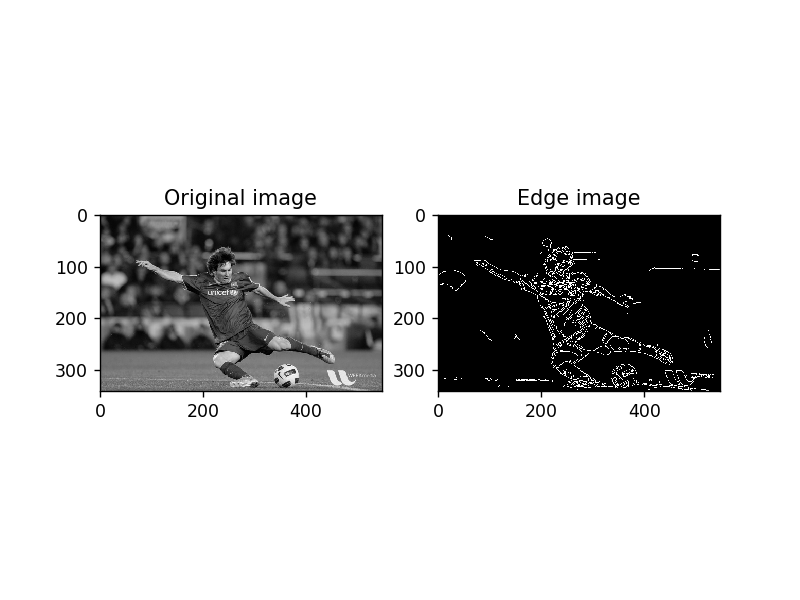

Text(0.5,1,'Edge image')

In [38]:
img=cv2.imread('messi5.jpg',0)
edge = cv2.Canny(img,100,200)
figure()
subplot(121),imshow(img,cmap='gray')
title('Original image')
subplot(122),imshow(edge,cmap='gray')
title('Edge image')

<IPython.core.display.Javascript object>


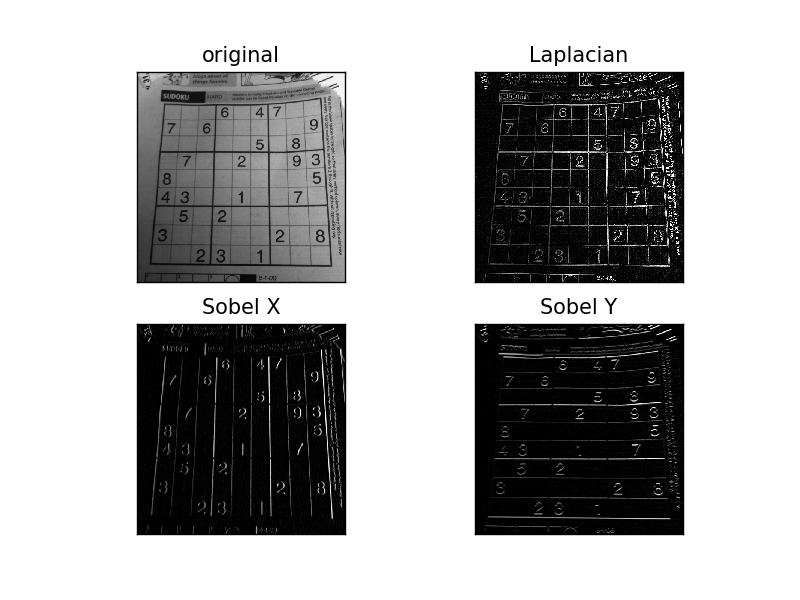

In [36]:
img = cv2.imread('sudokubig.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

figure()
subplot(2,2,1),imshow(img,cmap='gray')
title('original'),xticks([]),plt.yticks([])
subplot(2,2,2),imshow(laplacian,cmap='gray')
title('Laplacian'),xticks([]),plt.yticks([])
clim([0,45])
subplot(2,2,3),imshow(sobelx,cmap='gray')
title('Sobel X'), xticks([]), plt.yticks([])
clim([0,4500])
subplot(2,2,4),imshow(sobely,cmap='gray')
title('Sobel Y'),xticks([]),plt.yticks([])
clim([0,4500])

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


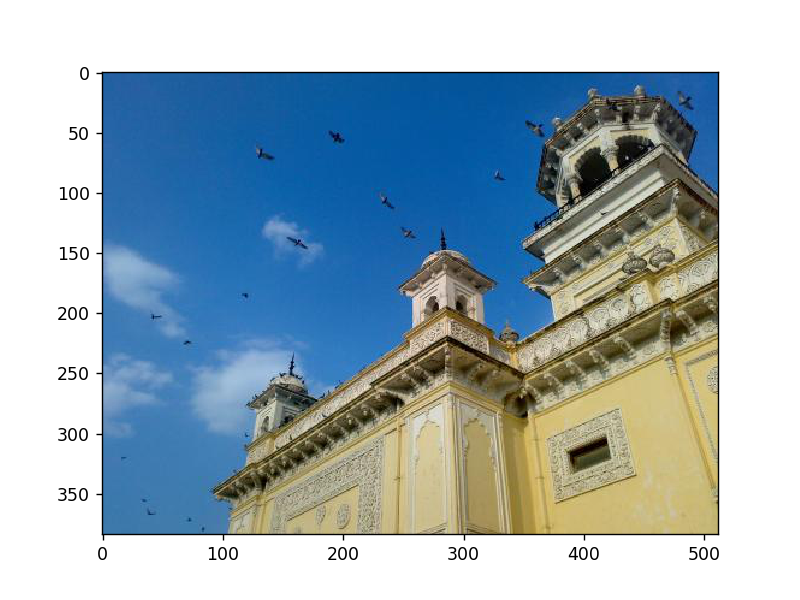

In [31]:
%pylab notebook
import numpy
import cv2
import matplotlib.pyplot as plt
im2disp=imread('home.jpg')
plt.figure()
imshow(im2disp)

<IPython.core.display.Javascript object>


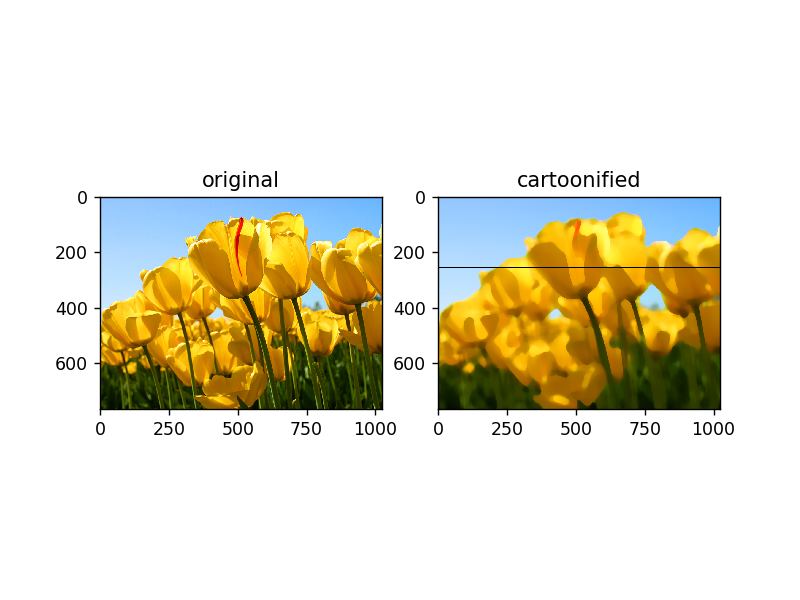

Text(0.5,1,'cartoonified')

In [34]:
tulips = imread('Tulips.jpg')
tublur = cv2.medianBlur(tulips,29)

edge=cv2.Canny(tublur,10,150)
kernel = np.ones((5,5),np.uint8)
edge=cv2.dilate(edge,kernel,iterations=1)
tublur[edge--255]=0

figure()
subplot(1,2,1)
imshow(tulips)
title('original')
subplot(1,2,2)
imshow(tublur)
title('cartoonified')

<IPython.core.display.Javascript object>


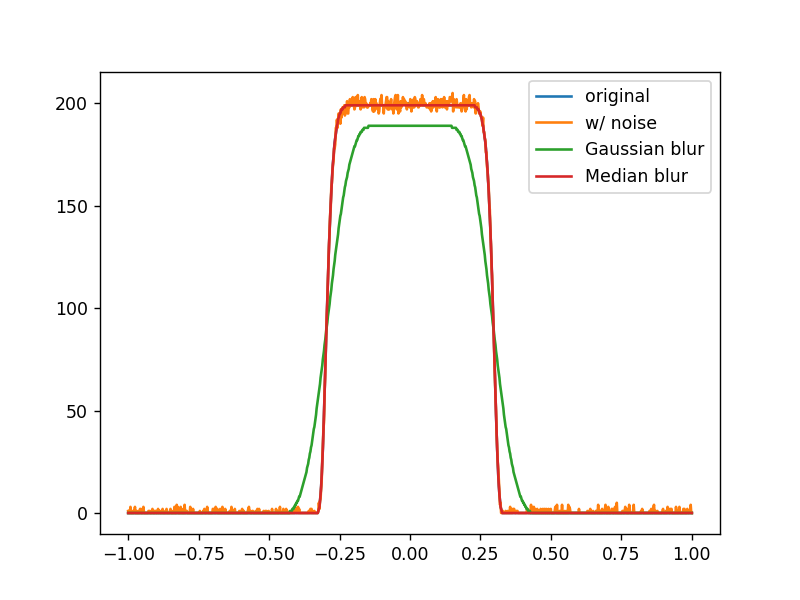

In [33]:
t=linspace(-1.0,1,1000)
y=200*(exp(-(t/0.3)**20))
yn=y+200*random.normal(scale=0.01,size=t.shape)
yn[yn<0]=0
y = y.astype(uint8)
yn = yn.astype(uint8)

figure()
plot(t,y)
plot(t,yn)

ygb = cv2.GaussianBlur(y,(199,199),0)
plot(t,ygb)

ymb = cv2.medianBlur(y,199)
plot(t,ymb)

legend(['original', 'w/ noise', 'Gaussian blur', 'Median blur'])


<IPython.core.display.Javascript object>


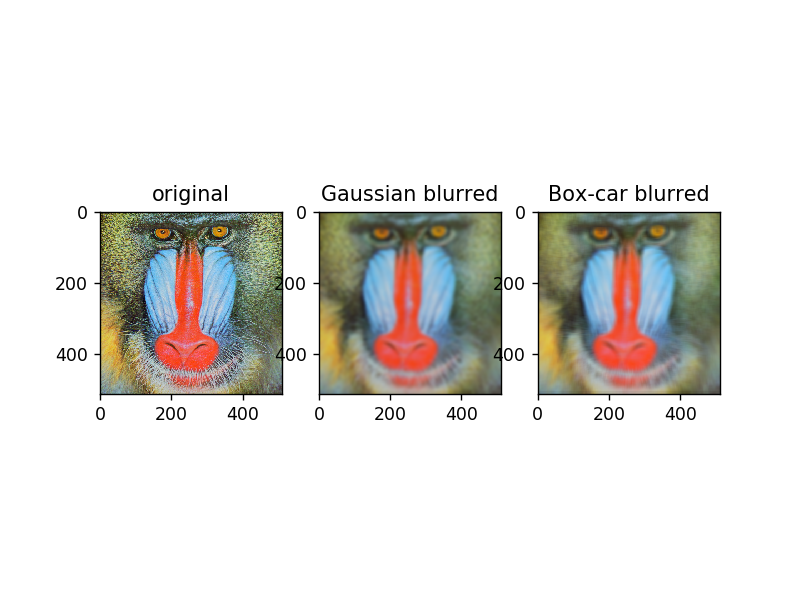

Text(0.5,1,'Box-car blurred')

In [30]:
baboon = imread('baboon.jpg')
babblur = cv2.GaussianBlur(baboon,(29,29),0)

kernel = np.ones((15,15),np.float32)
kernel /= kernel.size

babblur2 = cv2.filter2D(baboon,-1,kernel)

figure()
subplot(1,3,1)
imshow(baboon)
title('original')
subplot(1,3,2)
imshow(babblur)
title('Gaussian blurred')
subplot(1,3,3)
imshow(babblur2)
title('Box-car blurred')

<IPython.core.display.Javascript object>


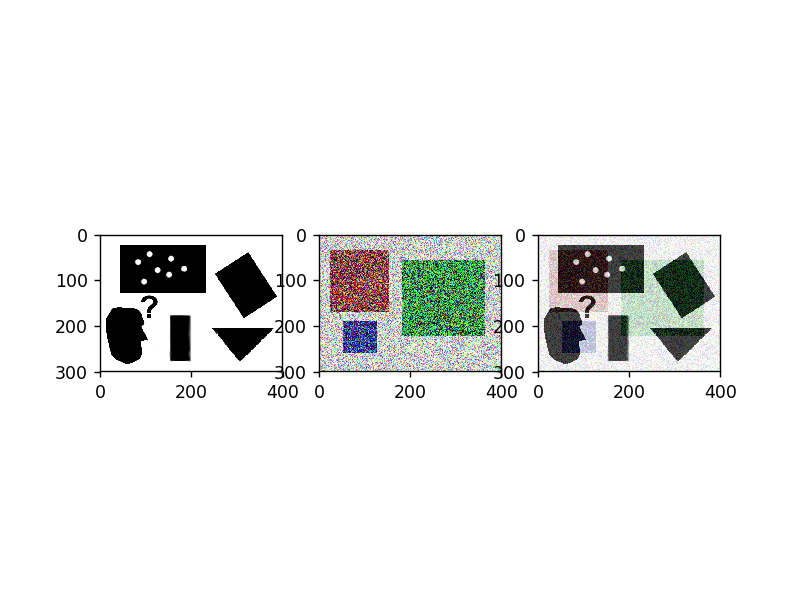

In [28]:
x = np.uint8([250])
y = np.uint8([10])
cv2.add(x,y)

img1 = imread('pic1.png')
img2 = imread('pic2.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

figure()
subplot(1,3,1)
imshow(img1)
subplot(1,3,2)
imshow(img2)
subplot(1,3,3)
imshow(dst)


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


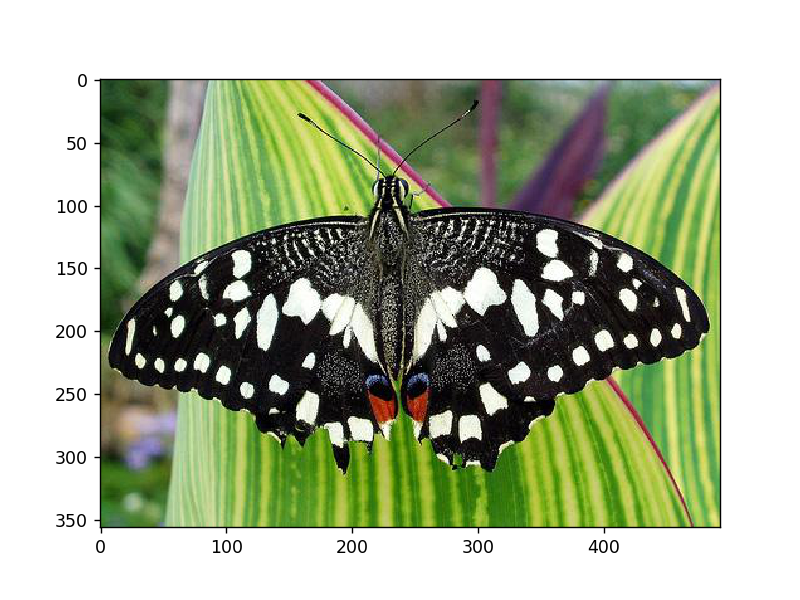

<IPython.core.display.Javascript object>


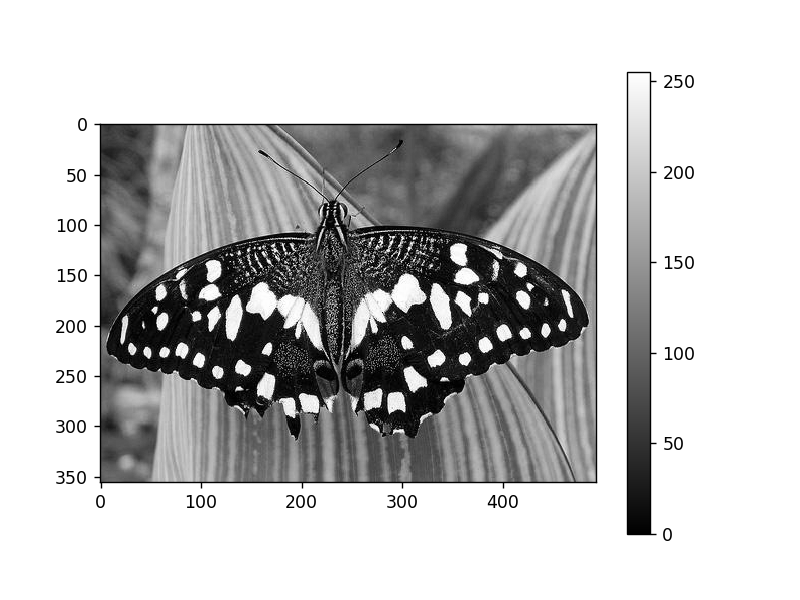

(356, 493, 3)
(356, 493)
[0 1 2 3 4]


<IPython.core.display.Javascript object>


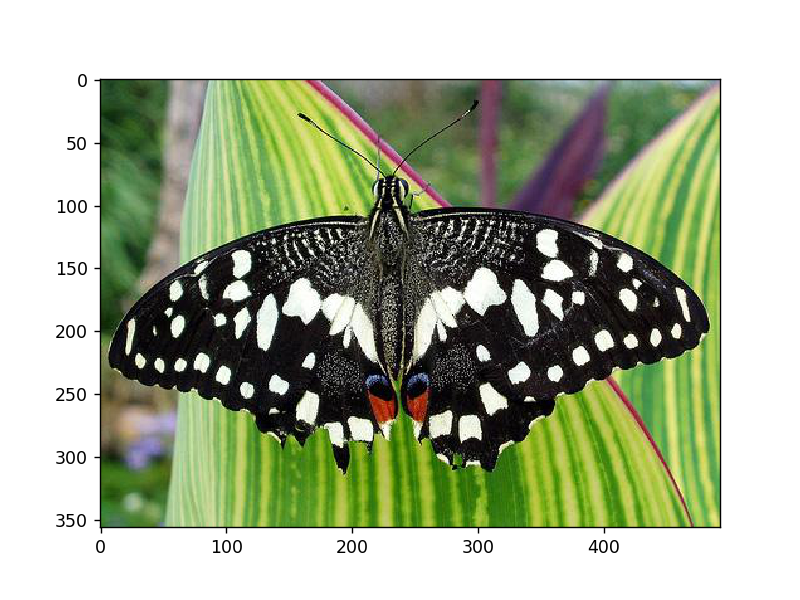

<IPython.core.display.Javascript object>


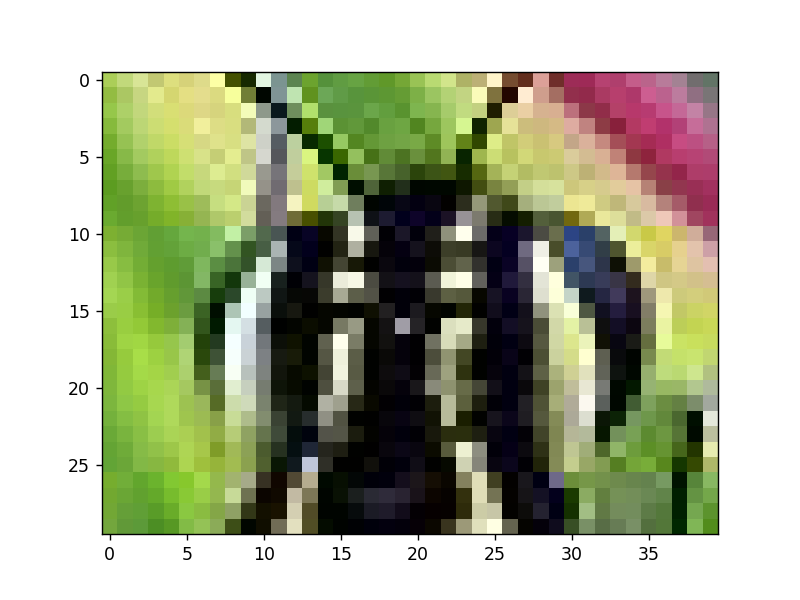

In [25]:
%pylab notebook
import cv2
bfly = imread('butterfly.jpg')
figure()
imshow(bfly)
bflygray = cv2.cvtColor(bfly,cv2.COLOR_BGR2GRAY)
figure()
imshow(bflygray,cmap='gray')
colorbar()
print(bfly.shape)
print(bflygray.shape)
bfly.dtype
dflyfloat = bflygray.astype(double)/255.0
dflyfloat.dtype
height,width = bflygray.shape[0:2]
height, width
print(arange(5))
redc = bfly[:,:,0]
greenc=bfly[:,:,1]
bluec=bfly[:,:,2]
combined = zeros((height,width,3),uint8)
combined[:,:,0] = redc
combined[:,:,1] = greenc
combined[:,:,2] = bluec
figure()
imshow(combined)

bflyhead = bfly[70:100,210:250]
figure()
imshow(bflyhead)

In [33]:
cvim2disp = cv2.imread('home.jpg')
cv2.imshow('HelloWorld',cvim2disp)
cv2.waitKey()
cv2.destroyWindow('HelloWorld')